# Python walk-through for Titanic data analysis

https://www.kaggle.com/headsortails/pytanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = pd.concat([train.drop('Survived',1),test])

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 處理 missing data

In [4]:
print(train.isnull().sum())
print(train.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [5]:
print(test.isnull().sum())
print(test.info())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


1. train 資料缺"Age", "Cabin", "Embarked"
2. test 資料缺"Age", "Cabin", "Fare"

處理"Age" 的 missing data

In [6]:
# 建立一個"Age"的標準差平均隨機數字的array
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # 介在平均、標準差、遺失值的隨機數字
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # 填隨機數字
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()

0

處理 "Embarked" 的 missing data

In [7]:
# 用 common value 補
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

處理 "Cabin" 的 missing data

In [8]:
# 因為缺太多，所以直接拿掉
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

處理 "Fare" 的 missing data

In [9]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [10]:
# 用 common value 補
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(common_value)

把不會用到的column拿掉

In [11]:
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Ticket'], axis=1)

In [12]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [13]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [14]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   SibSp     418 non-null    int64
 4   Parch     418 non-null    int64
 5   Fare      418 non-null    int64
 6   Embarked  418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB


In [15]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


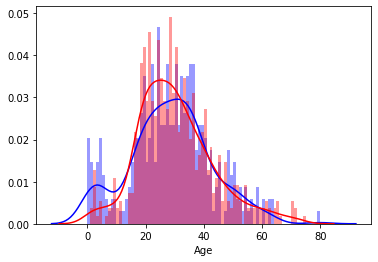

In [16]:
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), color = "blue", axlabel = 'Age')
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), color = "red", axlabel = 'Age')

In [17]:
median_age_surv = np.median(surv['Age'].dropna())
median_age_nonsurv = np.median(nosurv['Age'].dropna())
print("Median age survivors:", median_age_surv, ", Median age non-survivers:", median_age_nonsurv)

Median age survivors: 29.0 , Median age non-survivers: 28.0


"Age" 中，存活的中位數為28，在0~10歲左右的小孩存活率也較高，在30歲之後的分佈接近常態分佈。
死亡的中位數為28，整體分佈情形近似於常態分佈。

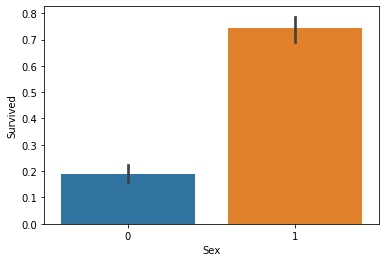

In [18]:
sns.barplot('Sex', 'Survived', data=train)

"Sex" 出現 女性存活率 >> 男性存活率

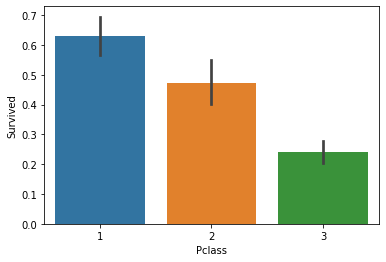

In [19]:
sns.barplot('Pclass', 'Survived', data=train)

"Pclass"表示3個等級的座位，由高到低1->3，圖中顯示高級座位區的存活率 > 次級座位區的存活率 > 最低等級座位區的存活率

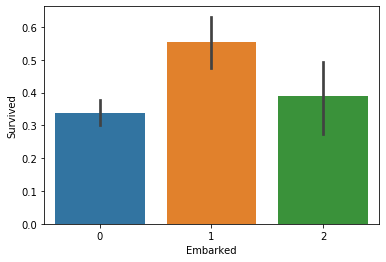

In [20]:
sns.barplot('Embarked', 'Survived', data=train)

"Embarked"表示出發的港口代號，雖然乍看之下跟存活率好像沒什麼關係，但從圖會發現"C港口的存活率" > "Ｓ港口的存活率"

/Users/lnl/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


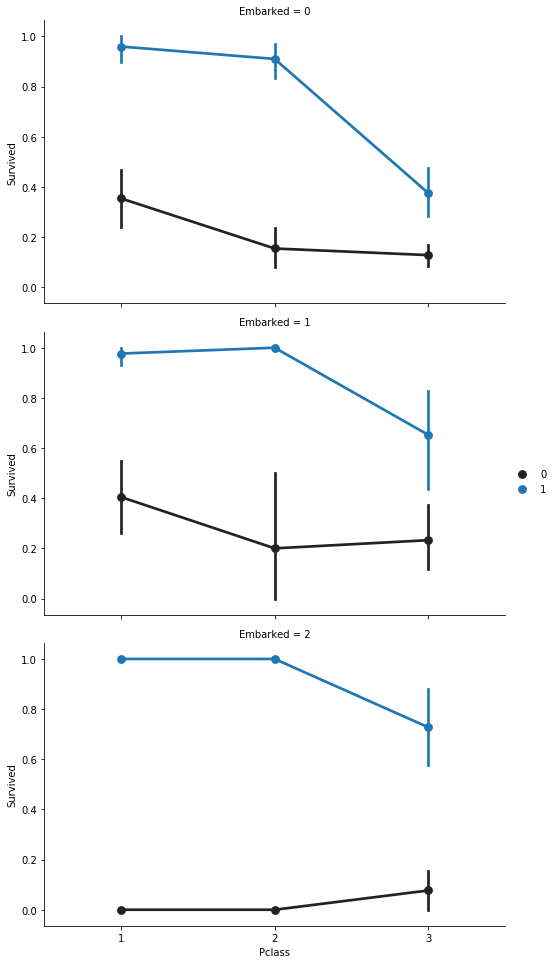

In [21]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

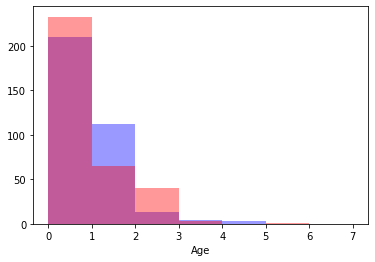

In [22]:
sns.distplot(surv['SibSp'].dropna().values, bins=range(0, 8, 1), kde=False,color = "blue", axlabel = 'Age')
sns.distplot(surv['Parch'].dropna().values, bins=range(0, 8, 1), kde=False,color = "red", axlabel = 'Age')

"SibSp"表示有幾個兄弟姊妹或配偶一同旅行，"Parch"表示有幾個爸媽或小孩一同旅行。從圖中可以看出有1~3個家人一起存活的機率比較高。

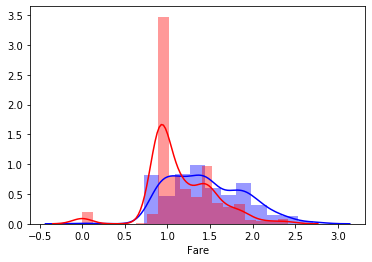

In [23]:
sns.distplot(np.log10(surv['Fare'].dropna().values+1), color = "blue", axlabel='Fare')
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), color = "red", axlabel='Fare')

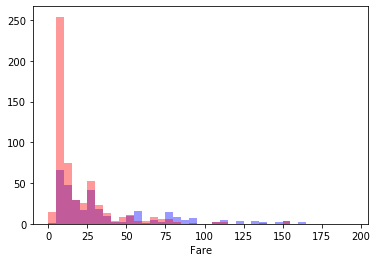

In [24]:
sns.distplot(surv['Fare'].dropna().values, bins=range(0, 200, 5), kde=False, color = "blue", axlabel = 'Fare')
sns.distplot(nosurv['Fare'].dropna().values, bins=range(0, 200, 5), kde=False, color = "red", axlabel = 'Fare')

"Fare"表示票價，看似與存活率沒關係，但票價偏低的人死亡率卻異常的高。合理的猜測可能是，票價越低的位子越深處，離救生船比較遠，因此死亡率比較高。

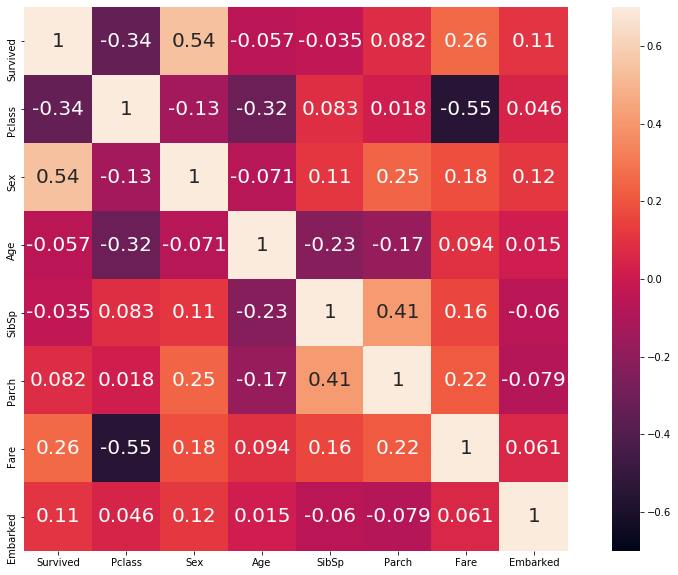

In [25]:
plt.figure(figsize=(16,10))
foo = sns.heatmap(train.corr(), vmax=0.7,vmin=-0.7, square=True, annot=True,annot_kws={"size": 20})

從相關圖可以看出：
1. "Pclass" 跟 "Fare" 相關係數為-0.55，為中度負相關。非常合理，因為高等級座位(class1)票價較高。
2. "SibSp" 和 "Parch" 相關係數為0.41，為中度正相關，推測因為較多人的家族可能兩個都有，一個人的兩個都為0。
3. "Pclass" 跟 "Age" 相關係數為-0.32，為中度負相關，推測較低等級座位的成年人比較多，較高等級座位的小孩比較多。
4. "Pclass" 跟 "Survived" 相關係數為-0.34，為中度負相關，推測原因教高等級座位的人離救生船比較近，生存率較高。

In [27]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9685746352413019